In [173]:
import jax
import jax.numpy as jnp
from tqdm import tqdm
import netket as nk
# import netket_pro as nkp
import matplotlib.pyplot as plt
import os

In [174]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [175]:
from grad_sample.utils.plotting_setup import *

In [176]:
alpha = 1
path1 = f"/scratch/.amisery/grad_sample/ising_1.0/L3/RBM/alpha{alpha}/saved_3_10/out_analysis_oneshot_curved_dist.npz"

out_dict1 = jnp.load(path1, allow_pickle=True)["arr_0"].item()

In [177]:
steps = out_dict1.keys()

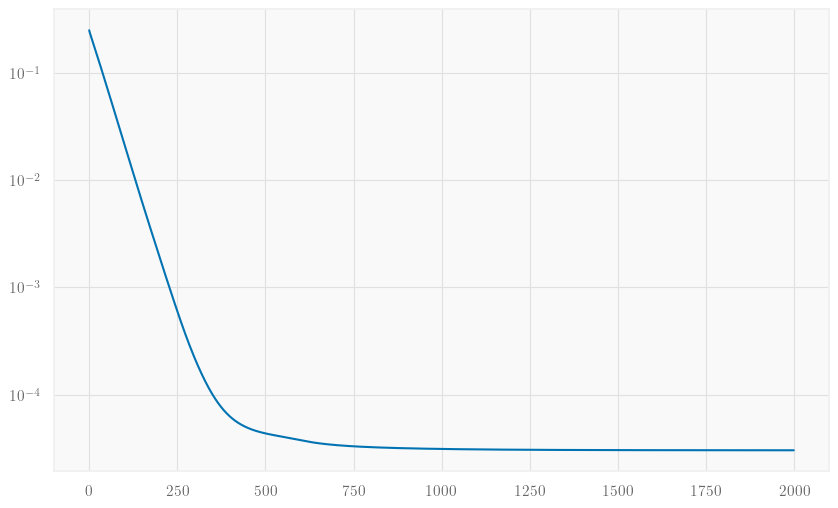

In [178]:
plt.plot(out_dict1["commons"]["E_err"])
plt.yscale("log")

In [179]:
print(steps)

dict_keys([0.001, 0.0001, 1e-05, 1e-06, 'commons'])


In [180]:
nparams = alpha*(9)*(9) + 9*alpha + 9
print(nparams)

99


In [181]:
print(out_dict1[delta_l[0]][list(out_dict1[delta_l[0]].keys())[0]]["dp_dist_ev"])

[1.95869987e-11 4.82089924e-11 8.37212522e-11 1.22930111e-10
 1.52899027e-10 2.41909381e-10 3.04033243e-10 4.42365034e-10
 5.13598497e-10 6.95683067e-10 8.36557046e-10 1.06106901e-09
 1.32881861e-09 1.51677448e-09 2.22688179e-09 2.68619838e-09
 3.11196891e-09 3.84415211e-09 4.57475480e-09 5.57488257e-09
 6.38636767e-09 7.19433537e-09 8.07676972e-09 8.45798478e-09
 1.01368818e-08 1.12981454e-08 1.22892557e-08 1.40617576e-08
 1.57158022e-08 1.60628930e-08 1.61603173e-08 1.81333097e-08
 1.93586272e-08 1.85121676e-08 2.03214463e-08 2.23633741e-08
 2.51791147e-08 2.63644846e-08 2.66992402e-08 2.78922461e-08
 2.85275708e-08 2.99568486e-08 3.37795614e-08 3.47296044e-08
 3.69649765e-08 3.88333114e-08 4.04443333e-08 4.32331119e-08
 4.56584330e-08 4.58463218e-08 4.57818660e-08 4.37875684e-08
 4.24042538e-08 4.63273301e-08 4.88641863e-08 4.85893086e-08
 5.48848276e-08 5.66454442e-08 5.64244150e-08 6.26427999e-08
 6.79715506e-08 7.91672047e-08 8.10392809e-08 7.69044289e-08
 7.84580266e-08 8.160712

249


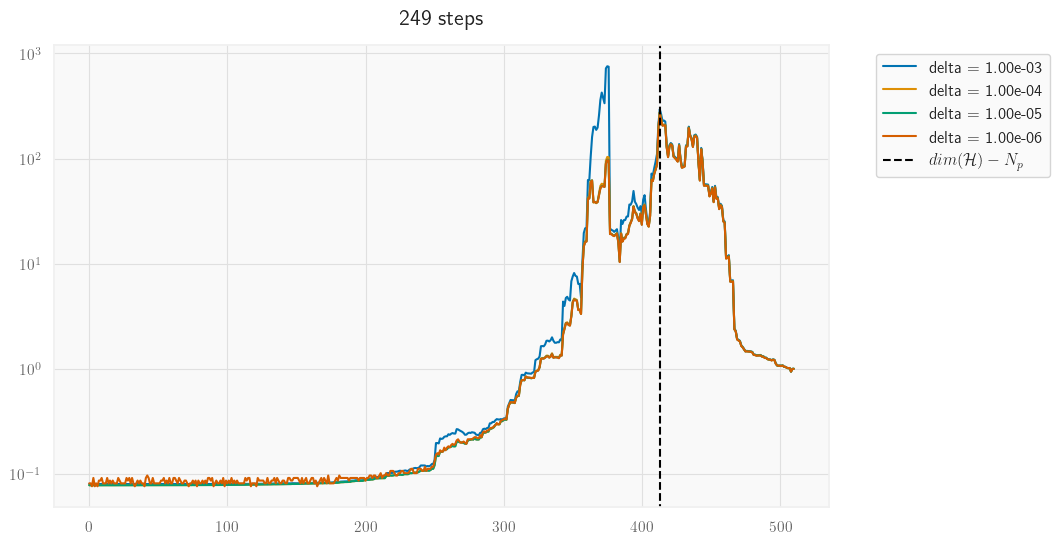

In [185]:
delta_l = [1e-3, 1e-4, 1e-5, 1e-6]
i = 2

j = list(out_dict1[delta_l[0]].keys())[i]
print(j*3)
for delta in delta_l:
    if type(j) == int:
        plt.plot(out_dict1[delta][j]["infid_ev"], label = "delta = %.2e"%delta)
        plt.yscale("log")

plt.title("%d steps"%(j*3))
plt.vlines(len(out_dict1[delta_l[0]][list(out_dict1[delta_l[0]].keys())[0]]["infid_ev"]) - nparams,10e-4, 10e4, linestyles= "--", color="black", label="$dim(\mathcal{H}) - N_p$")
plt.legend(bbox_to_anchor = (1.05, 1))

In [183]:
out_dict1[delta_l[0]][1]

{'in_idx': Array([370, 293,  95, 477,  31, 189,  19, 463, 222, 327, 341, 489, 428,
        108, 361,  59, 393, 263, 218, 430, 433, 134, 472, 402,  39, 333,
        357, 301,  11, 217,  55,  72,  23, 460, 434,  58, 154, 467, 470,
        449,  83, 106,  89, 422,  54, 300,  60, 406, 351,  79,  91, 329,
         27,  62, 499, 476, 403, 409, 423, 457, 343, 294, 241, 186,  48,
        146,  51, 421, 215, 283, 202, 238, 262, 151, 471, 201, 109, 243,
        405, 101, 223, 141, 282, 432, 313, 118, 342, 506, 228, 435, 269,
        182, 209, 259, 399, 190, 175, 492,  47, 135, 126,  81, 303, 326,
        233, 348,  38, 478,  67, 335,  50, 309, 142, 504, 261, 442,  35,
        178, 105, 306,  41, 248, 244, 363, 110, 211, 364, 180, 198,  94,
        114,  69, 456, 172, 414,  71, 373, 158, 302,   7, 187, 185, 237,
          5, 416, 307, 177,  84, 451, 474, 397,  44,  13, 310, 147, 452,
        138,  88, 411,  87, 169, 210, 314, 465,  97, 377,   6, 275, 250,
        488,  15, 324,  17, 279,  33,  77

1


KeyError: 'in_idx'

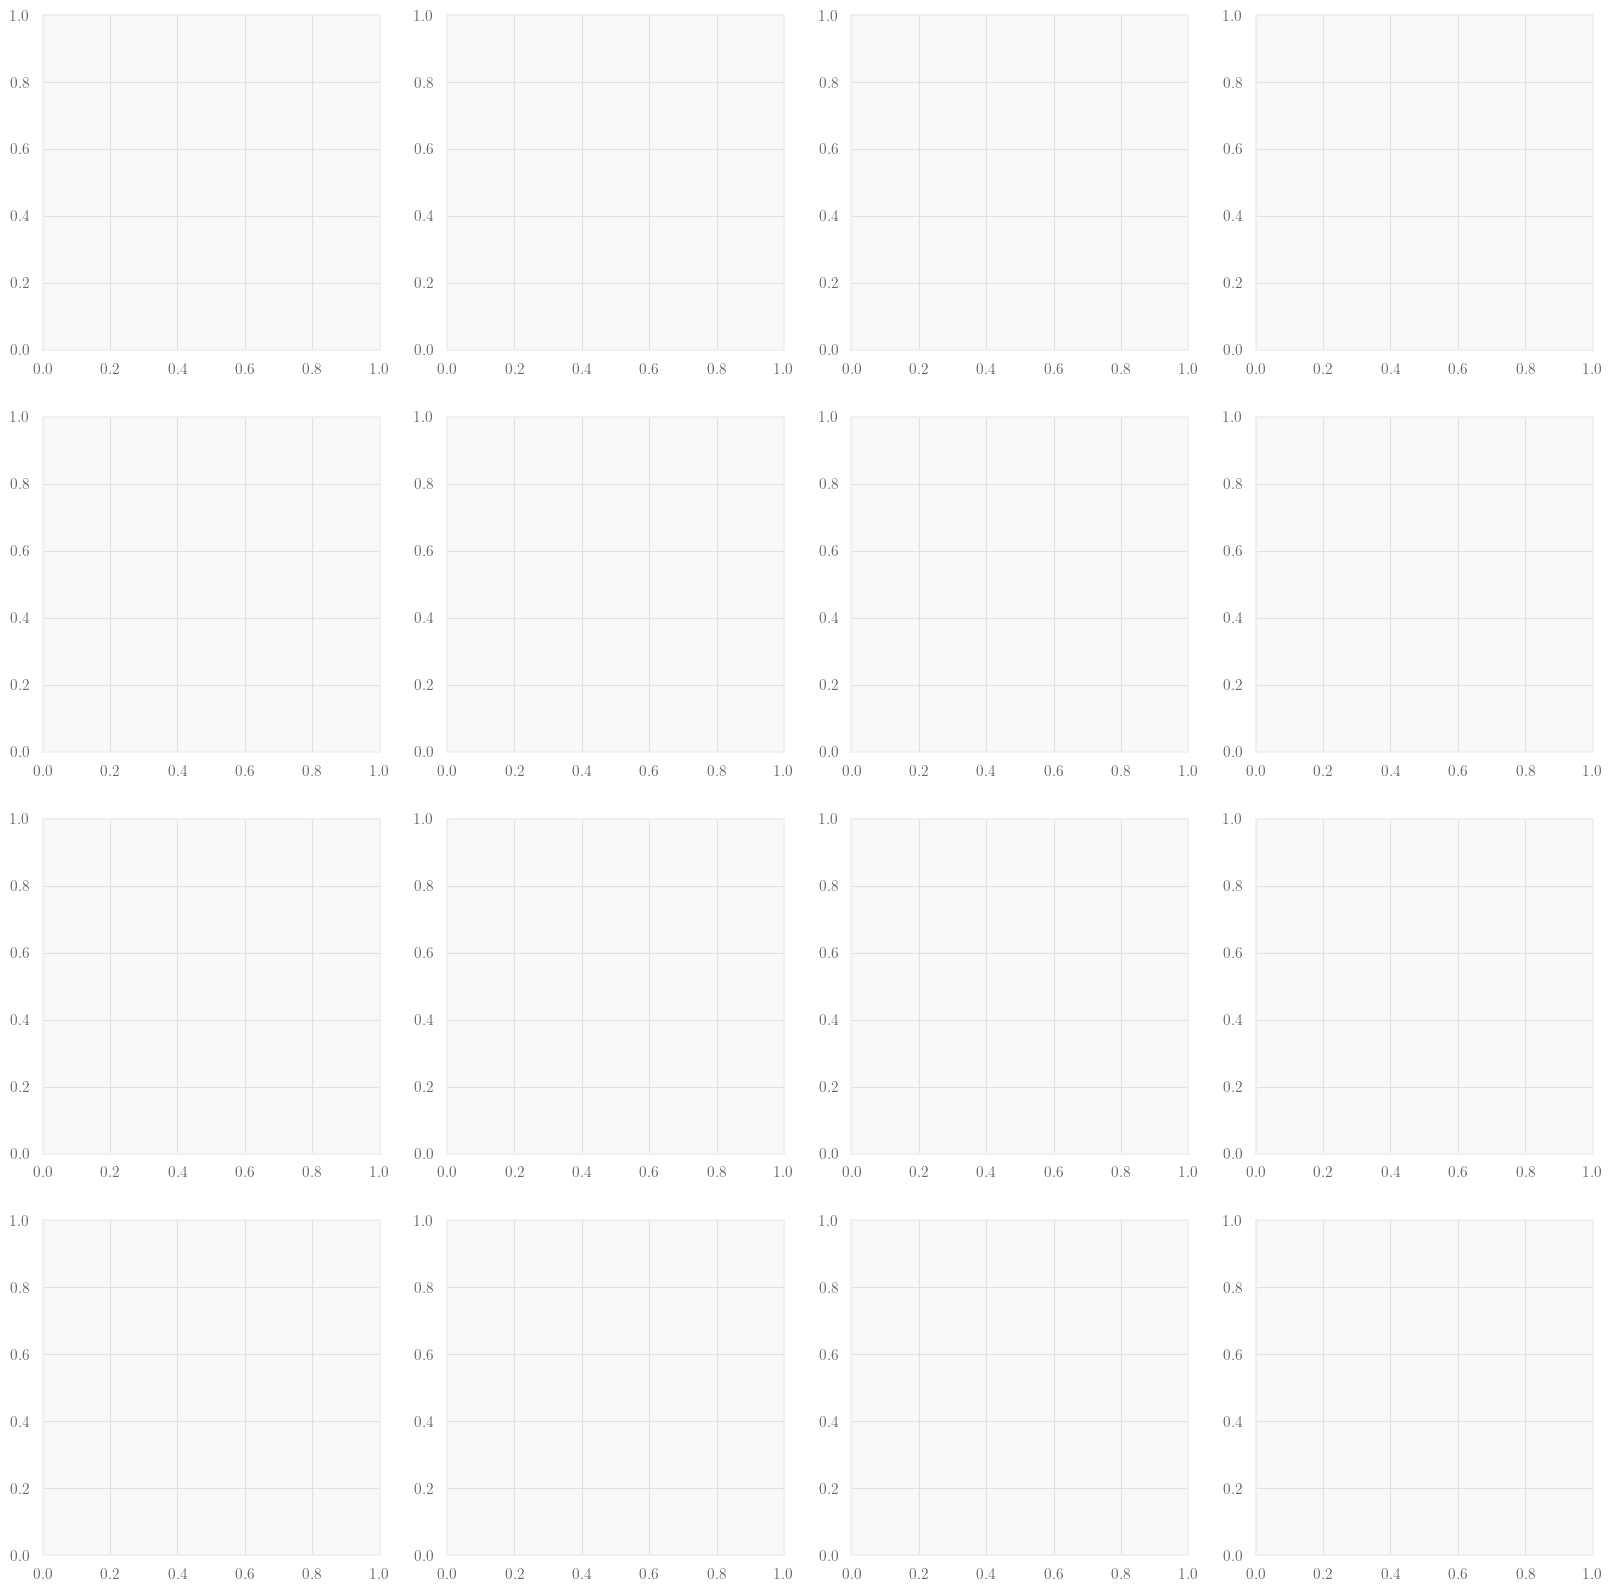

In [184]:
fig, axes = plt.subplots(4,4, figsize = (20,20))
i = 0

for j in range(1,len(steps), 5):
    step = list(steps)[j]
    print(j)
    vals = out_dict1[step]["in_idx"]
    pdf = out_dict1[step]["pdf"]
    hloc = jnp.abs(out_dict1[step]["Hloc"])
    hloc_c = jnp.sqrt(pdf)*(hloc - jnp.sum(hloc*pdf))
    # print(out_dict1[]["pdf"][vals])
    axes[i, 0].scatter(jnp.arange(512), out_dict1[step]["pdf"][vals])
    axes[i, 0].set_ylabel(r"$|\psi(\sigma_i)|^2$", fontsize = 18)
    # axes[0].set_yscale("log")
    axes[i, 1].scatter(jnp.arange(512),jnp.abs(out_dict1[step]["Hloc"])[vals])
    axes[i, 1].set_ylabel(r"$|\Delta H_{loc}(\sigma_i)|$", fontsize=18)
    # axes[1].set_yscale("log")
    axes[i, 2].scatter(jnp.arange(512), jnp.abs(hloc_c)[vals])
    # axes[2].set_yscale("log")
    axes[i, 2].set_ylabel(r"$|\nabla\log \psi(\sigma_i)|$", fontsize = 18)
    axes[i, 3].scatter(jnp.arange(512), jnp.abs(out_dict1[step]["pdf"])[vals])
    axes[i, 3].set_ylabel(r"$|\bra{\sigma_i}\Delta H \ket{\psi}|$", fontsize=18)
    i+=1

# fig.suptitle("Several quantities over sample removal, after %d its, relative error %.2e, centered quantities in full summation"%(save_every*state_idx, E_err[save_every*state_idx]), fontsize=20)
plt.show()

In [ ]:
for j in range(0,len(steps),5):
    print(j)

0
5
10
15
20
